In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir
from aimanager.utils.merge import merge_files_by_name

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


run = 'v1_2'

base_folder = f'../../data/manager/simulate_rule/{run}'

folder = os.path.join(base_folder, 'train')
merged_folder = os.path.join(base_folder, 'merged')

plot_folder = f'plots/{run}'

make_dir(plot_folder)
make_dir(merged_folder)

/home/mpib/brinkmann/repros/algorithmic-institutions/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def _plot_heatmap(data, x, y, values, normalise=True):
    dfg = data.groupby([x,y])[values].sum()
    dfg = dfg.reset_index()
    if normalise:
        dfg[values] = dfg[values] / dfg.groupby([x])[values].transform('sum')
    cm = dfg.pivot_table(index=x, columns=y, values=values)
    cm = cm.sort_index(ascending=False)
    sns.heatmap(cm)

In [3]:
file_names = ['trace.csv']


def get_df(file_name, merged_folder, folder):
    m_file = os.path.join(merged_folder, file_name)
    if not os.path.isfile(m_file):
        df = merge_files_by_name(folder, file_name)
        df.to_parquet(m_file)
        return df
    else:
        return pd.read_parquet(m_file)

sim_df = get_df('trace.csv', merged_folder, folder)


ValueError: No objects to concatenate

In [ ]:
sim_df = sim_df.sort_values(['s', 'b','c', 'round_number'])

df_melt = pd.melt(sim_df, id_vars=['s', 'b','c', 'round_number'], value_vars=['punishments', 'common_good', 'contributions'], var_name='metric', value_name='value')

sim_df.head()

,Unnamed: 0,round_number,punishments,common_good,contributions,s,b,c
0,0,0,0.0,19.152000,11.9700,0.0,0.0,0.0
1,1,1,0.0,15.448000,9.6550,0.0,0.0,0.0
2,2,2,0.0,14.284000,8.9275,0.0,0.0,0.0
3,3,3,0.0,13.688001,8.5550,0.0,0.0,0.0
4,4,4,0.0,12.256001,7.6600,0.0,0.0,0.0


In [ ]:
params = ['metric', 's', 'b','c',]

df = df_melt.groupby(params).sum().reset_index()
best = df.set_index(['s', 'b','c']).groupby(['metric'])['value'].idxmax()
max = df.set_index(['s', 'b','c']).groupby(['metric'])['value'].max()

best = {k: v for k, v in zip(['s', 'b','c'], best['common_good'])}
max

metric
common_good      246.615002
contributions    247.487500
punishments      165.572500
Name: value, dtype: float64

In [ ]:
best

{'s': 2.0, 'b': 0.0, 'c': 1.6}

<AxesSubplot:xlabel='c', ylabel='value'>

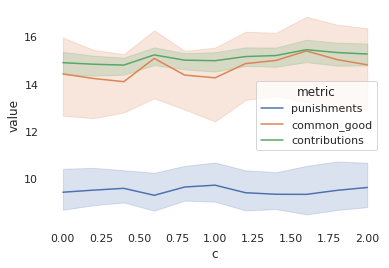

In [ ]:
focus = 'c'

df = df_melt.copy()

selection = {k: v for k, v in best.items() if k != focus}

w = pd.concat(
    (df[k] == v
    for k,v in selection.items()), axis=1
).all(1)

df = df[w]

sns.lineplot(data=df, x=focus, y='value', hue='metric')

<AxesSubplot:xlabel='s', ylabel='value'>

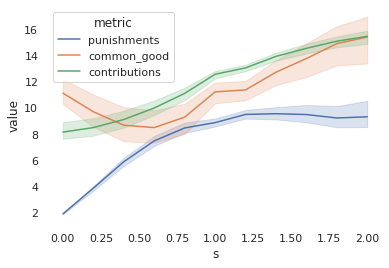

In [ ]:
focus = 's'

df = df_melt.copy()

selection = {k: v for k, v in best.items() if k != focus}

w = pd.concat(
    (df[k] == v
    for k,v in selection.items()), axis=1
).all(1)

df = df[w]

sns.lineplot(data=df, x=focus, y='value', hue='metric')

<AxesSubplot:xlabel='b', ylabel='value'>

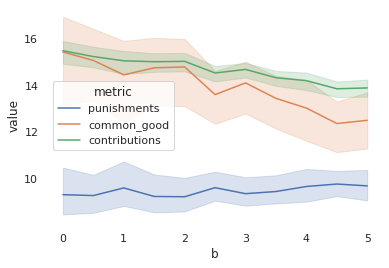

In [ ]:
focus = 'b'

df = df_melt.copy()

selection = {k: v for k, v in best.items() if k != focus}

w = pd.concat(
    (df[k] == v
    for k,v in selection.items()), axis=1
).all(1)

df = df[w]

sns.lineplot(data=df, x=focus, y='value', hue='metric')

<AxesSubplot:xlabel='b', ylabel='value'>

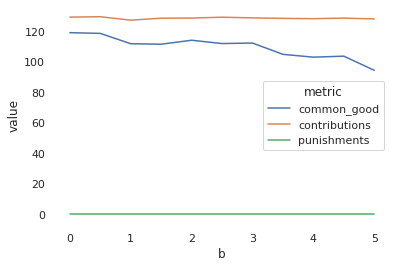

In [ ]:
focus = 'b'
params = ['s', 'b','c', 'metric']
p_wo_agg = list(set(params) - set([focus]))

df = df_melt.groupby(params).sum().reset_index()
df = df.groupby([focus, 'metric']).min().reset_index()
sns.lineplot(data=df, x=focus, y='value', hue='metric')

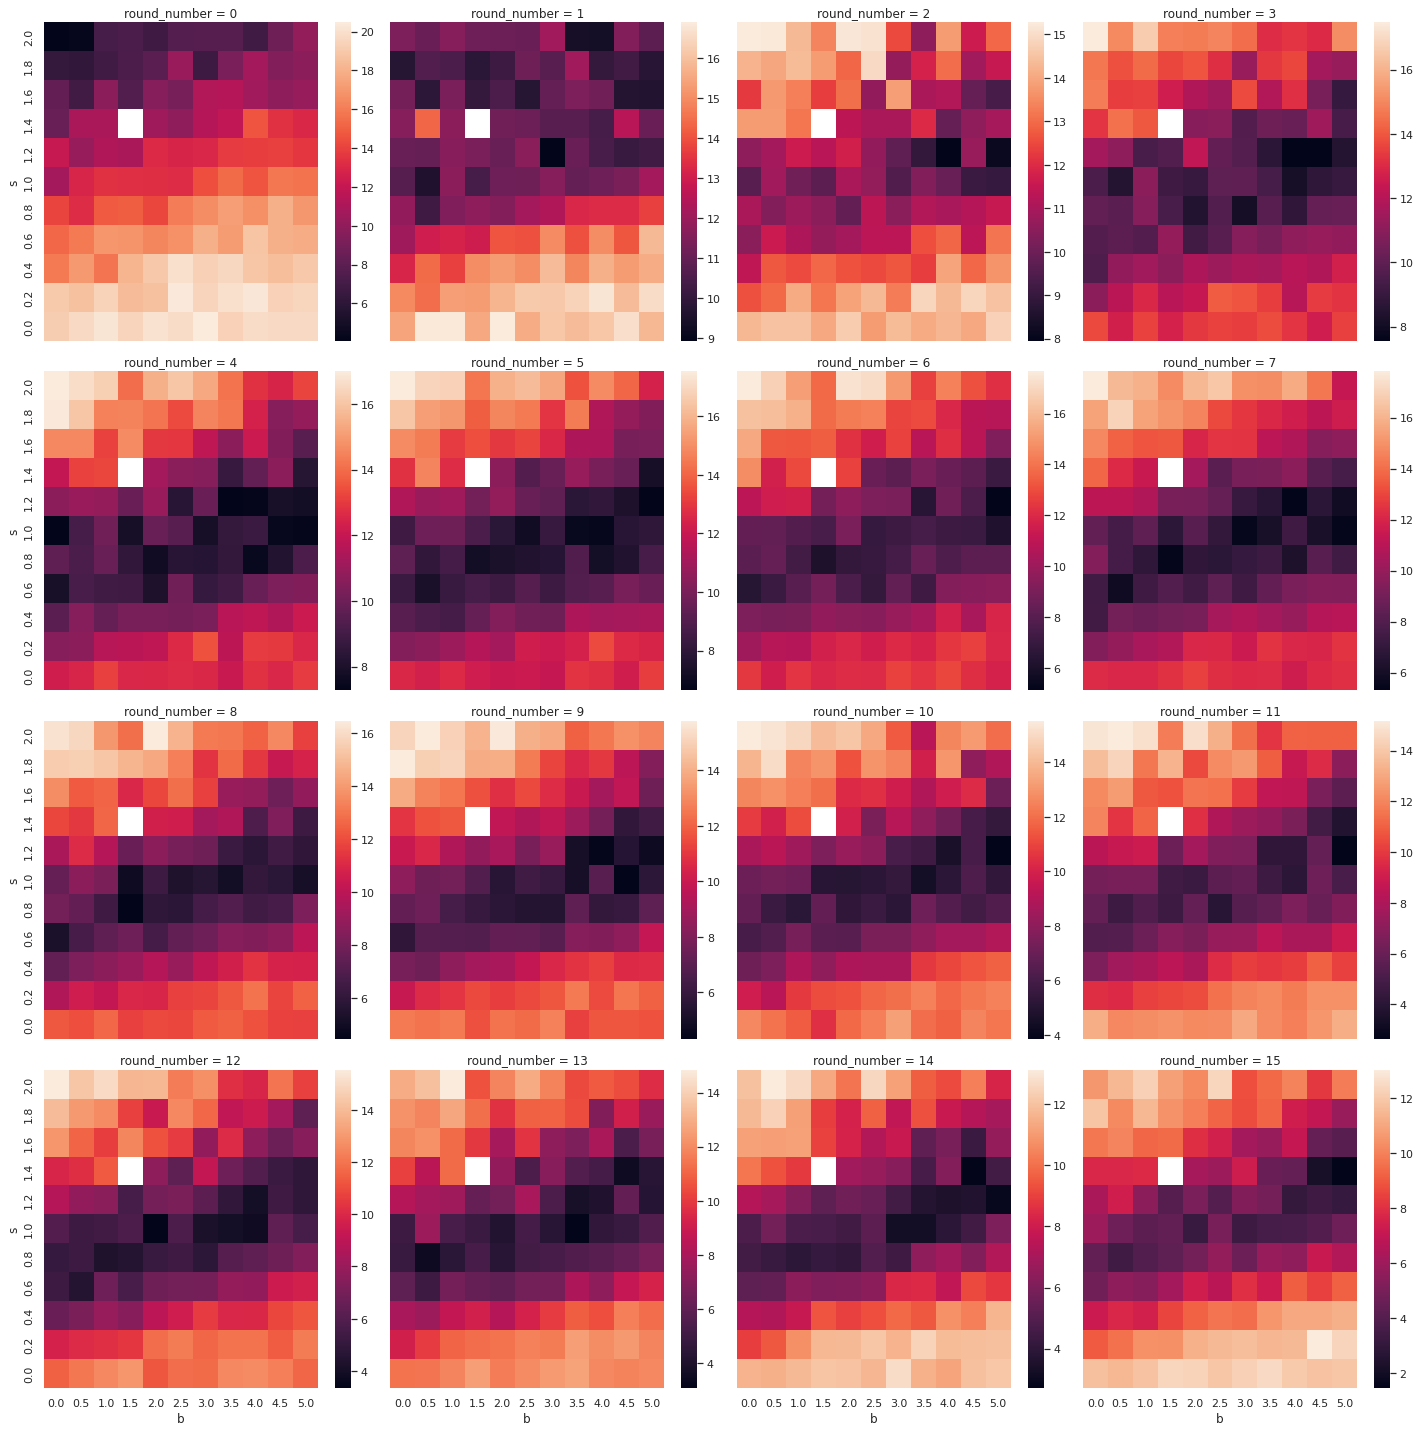

In [ ]:
df = sim_df.copy()

w = (
    df['s'] == 0
)
df = df[w]


plot_heatmap = lambda data, color: _plot_heatmap(
    data, x='s',y='b', values='common_good', normalise=False)

fg = sns.FacetGrid(
    df, col='round_number',
    col_wrap=4,
    height=5)
fg.map_dataframe(plot_heatmap)

# fg.set(xlabel='previous contribution', ylabel='previous punishment')

# fg.savefig(os.path.join(plot_folder, 'expected_contribution.jpg'))

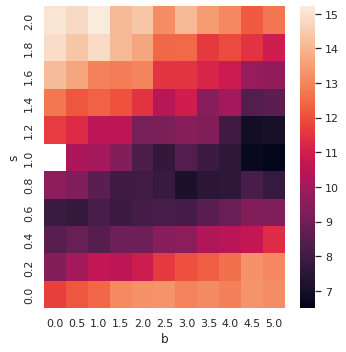

In [ ]:
df = sim_df.copy()

df = sim_df.groupby(['s', 'b','c']).mean().reset_index()


w = (
    df['c'] == 1.8
)
df = df[w]

plot_heatmap = lambda data, color: _plot_heatmap(
    data, x='s',y='b', values='common_good', normalise=False)

fg = sns.FacetGrid(
    df,
    height=5)
fg.map_dataframe(plot_heatmap)

<AxesSubplot:xlabel='round_number'>

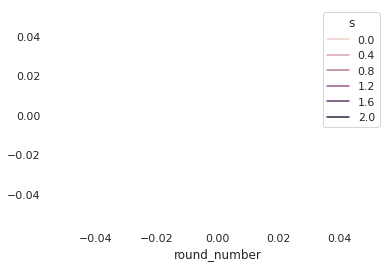

In [ ]:
df = sim_df.copy()

w = (
    (df['b'] == 0) &
    (df['c'] == 0)
)
df = df[w].reset_index(drop=True)

sns.lineplot(data=df, x='round_number', hue='s', y='')